In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('concrete_data.csv')

df.head()


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Text(0, 0.5, 'Concrete Compressive Strength')

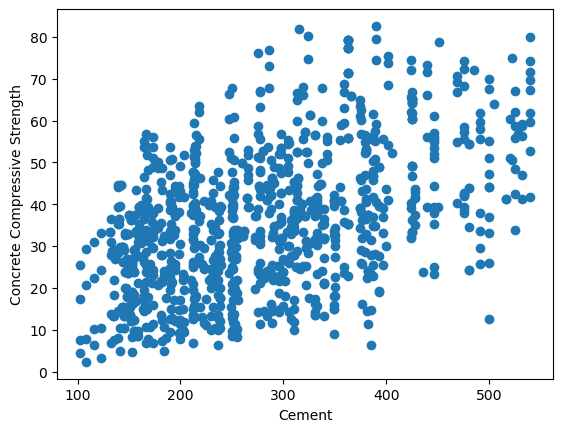

In [79]:
plt.scatter(df['cement'],df['concrete_compressive_strength'])
plt.xlabel('Cement')
plt.ylabel('Concrete Compressive Strength')

In [80]:
x=df.iloc[:,0:1] # cement
y=df.iloc[:,-1] # concrete_compressive_strength



In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # random_state=42 means fix the random state

In [82]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [83]:
x_test 

,cement
31,266.0
109,362.6
136,389.9
88,362.6
918,145.0
...,...
482,446.0
545,255.0
110,286.3
514,424.0


In [84]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: concrete_compressive_strength, Length: 206, dtype: float64

In [85]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34.50552595])

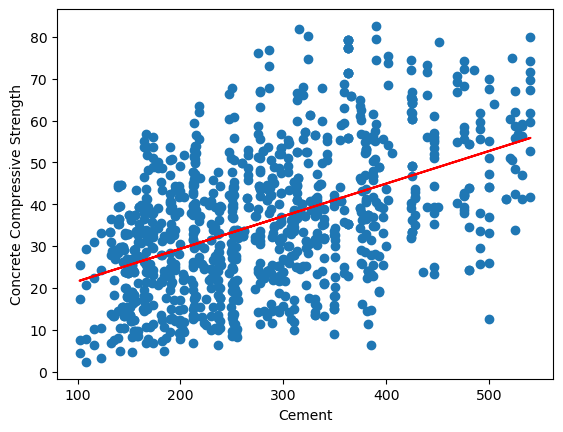

In [86]:
plt.scatter(df['cement'],df['concrete_compressive_strength'])
plt.xlabel('Cement')
plt.ylabel('Concrete Compressive Strength')

plt.plot(x_train,lr.predict(x_train),color='red')

0.07789606791104091 13.785171881915772


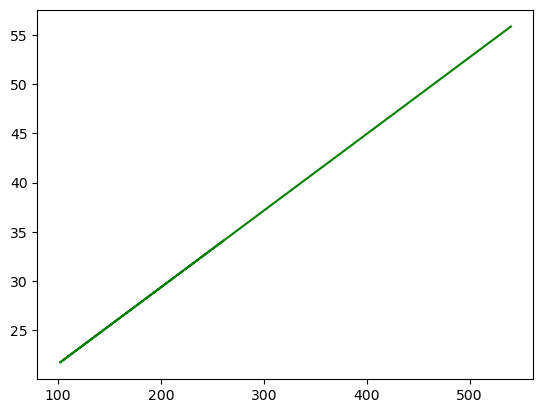

In [87]:
m =lr.coef_
b=lr.intercept_
print(m[0],b)

y=m[0]*x+b
plt.plot(x,y,color='green')

In [88]:
class SimpleLR:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, Y_train):
        n = len(X_train)
        x_mean = np.mean(X_train)
        y_mean = np.mean(Y_train)

        numer = np.sum((X_train - x_mean) * (Y_train - y_mean)) 
        denom = np.sum((X_train - x_mean) ** 2)

        self.m = numer / denom
        self.b = y_mean - (self.m * x_mean)

    def predict(self, X_test):
        return self.m * X_test + self.b
   
   
slr = SimpleLR()
slr.fit(x_train.values, y_train.values)
slr.predict(x_test.iloc[0].values)

array([35.85786408])